In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [11]:
N = 1000 
gaussian_quantiles = make_gaussian_quantiles(n_samples= N, mean=None, cov = 0.1, n_features=2, n_classes=2, shuffle=True, random_state=None)

In [12]:
X, Y = gaussian_quantiles
X.shape, Y.shape

((1000, 2), (1000,))

In [13]:
Y = Y[:, np.newaxis]

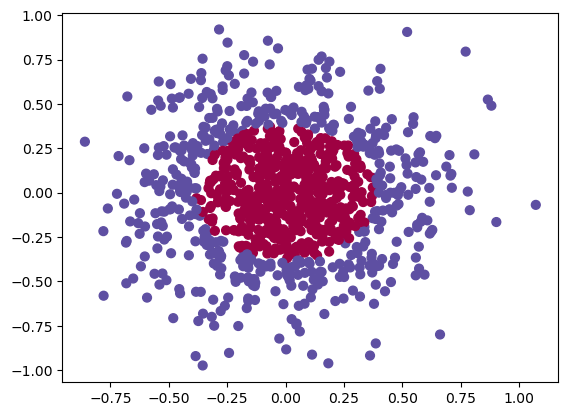

In [14]:
plt.scatter(X[:,0], X[:,1], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.show()

# Activation functions

In [15]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x) / ((np.exp(-x) + 1) **2)
    else:
        return 1 / (1 + np.exp(-x))
    
def relu(x, derivate = False):
    if derivate:
        x[X <= 0] = 0
        x[X > 0] = 1
        return x
    else:
        return np.maximum(0, x)

# Loss function

In [16]:
def mse(y, y_hat, derivate = False):
    if derivate:
        return (y_hat - y)
    else:
        return np.mean((y_hat - y) ** 2)

In [19]:
def initialize_parameters_deep(layers_dim):
    parameters = {}
    L = len(layers_dim)
    for l in range(0,L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) -1
        parameters['b' + str(l+1)] = (np.random.rand(1,layers_dim[l+1]) * 2) -1
    return parameters
    

In [21]:
layer_dims = [2, 4, 8, 2]

In [22]:
params = initialize_parameters_deep(layer_dims)

In [23]:
params

{'W1': array([[-0.04681272, -0.62087276, -0.59489123,  0.91417759],
        [ 0.65217998, -0.21257637, -0.89902174,  0.35294034]]),
 'b1': array([[ 0.26060857, -0.63662964, -0.11999962,  0.65565758]]),
 'W2': array([[ 0.4247648 ,  0.47520184,  0.1800261 ,  0.65874486, -0.58882642,
          0.85294498, -0.59317694,  0.60278353],
        [-0.02821641,  0.03459796, -0.34689177,  0.97864726, -0.66948373,
         -0.45643925,  0.38853012,  0.8998093 ],
        [ 0.14401286,  0.41932013,  0.50008321,  0.6052742 ,  0.07283803,
         -0.29510673, -0.04748781,  0.58232564],
        [ 0.04660679, -0.50571115, -0.84663293,  0.40203816,  0.85518709,
         -0.58599222,  0.27820436, -0.66842109]]),
 'b2': array([[-0.23565635, -0.50532111, -0.49331386, -0.7031075 ,  0.60084409,
          0.66789941,  0.70565954, -0.16630143]]),
 'W3': array([[ 0.90026128, -0.55702577],
        [ 0.02419496, -0.33009164],
        [-0.40531641,  0.54560528],
        [ 0.99635918, -0.40400719],
        [-0.00179